In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score

In [2]:
os.chdir(r'C:\Users\admin\Desktop\Kaggle_competition\car_insurance')

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'car_insurance-checkpoint.ipynb',
 'car_insurance.ipynb',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [6]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [7]:
test.shape

(39063, 43)

In [8]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [9]:
test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


In [10]:
## Duplicated values
train.duplicated().sum()

0

In [11]:
# first lets make policy_id as index as it only contains distinct values
train.drop('policy_id',axis=1,inplace=True)
test.drop('policy_id',axis=1,inplace=True)

In [12]:
train.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [13]:
obj=train.select_dtypes(include='object').columns
num=train.select_dtypes(exclude='object').columns

In [406]:
num

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'segment', 'model', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [355]:
# lets check null values

In [356]:
train.isnull().sum() # no null values

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

In [357]:
test.isnull().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

In [359]:
num

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [360]:
obj

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

In [361]:
# Univariate analysis

In [362]:
def uni_variate(a):
    b=train[a].nunique()
    c=train[a].value_counts()
    print(b)
    print(c)
    c.plot(kind='barh',figsize=(8,8))
    plt.title(a)
    plt.show()

22
C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64


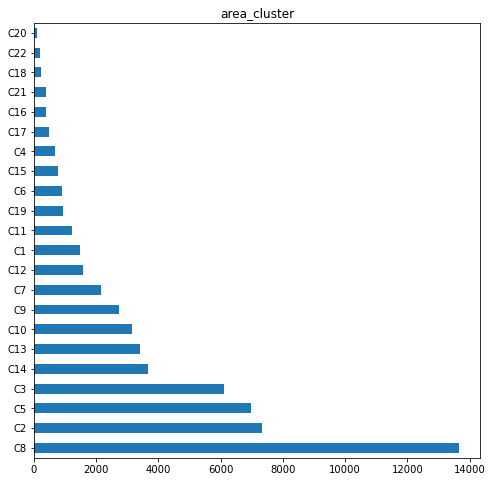

In [363]:
uni_variate('area_cluster')

6
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64


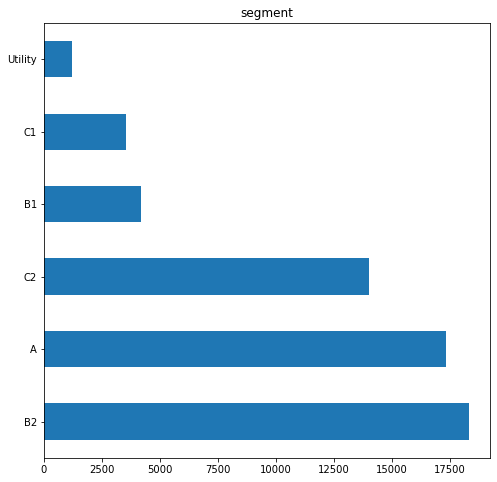

In [364]:
uni_variate('segment')

11
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64


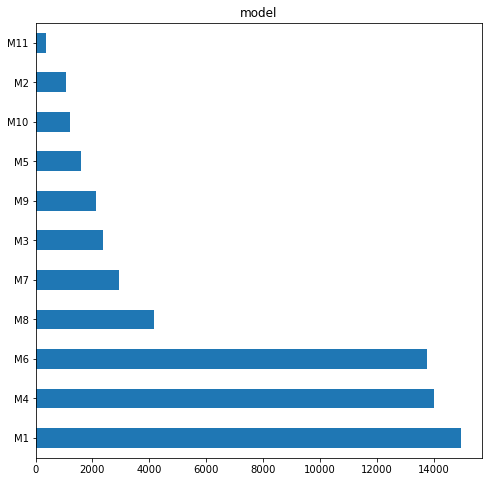

In [365]:
uni_variate('model')

In [366]:
obj

Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

3
Petrol    20532
CNG       20330
Diesel    17730
Name: fuel_type, dtype: int64


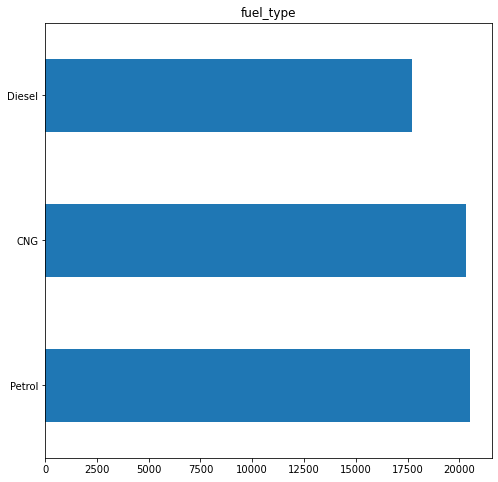

In [367]:
uni_variate('fuel_type')

9
113Nm@4400rpm     17796
60Nm@3500rpm      14948
250Nm@2750rpm     14018
82.1Nm@3400rpm     4173
91Nm@4250rpm       2373
200Nm@1750rpm      2114
200Nm@3000rpm      1598
85Nm@3000rpm       1209
170Nm@4000rpm       363
Name: max_torque, dtype: int64


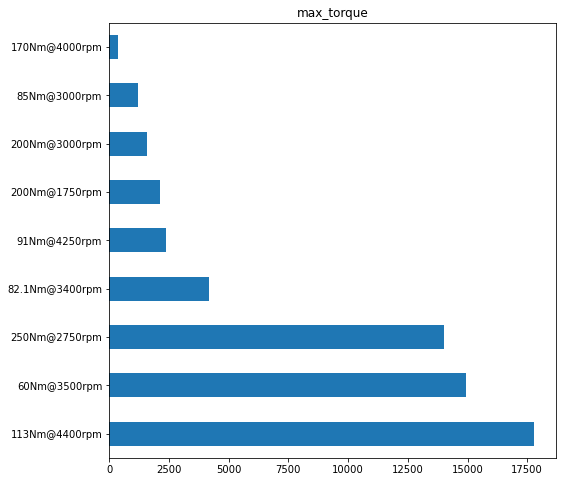

In [368]:
uni_variate('max_torque')

9
88.50bhp@6000rpm     17796
40.36bhp@6000rpm     14948
113.45bhp@4000rpm    14018
55.92bhp@5300rpm      4173
67.06bhp@5500rpm      2373
97.89bhp@3600rpm      2114
88.77bhp@4000rpm      1598
61.68bhp@6000rpm      1209
118.36bhp@5500rpm      363
Name: max_power, dtype: int64


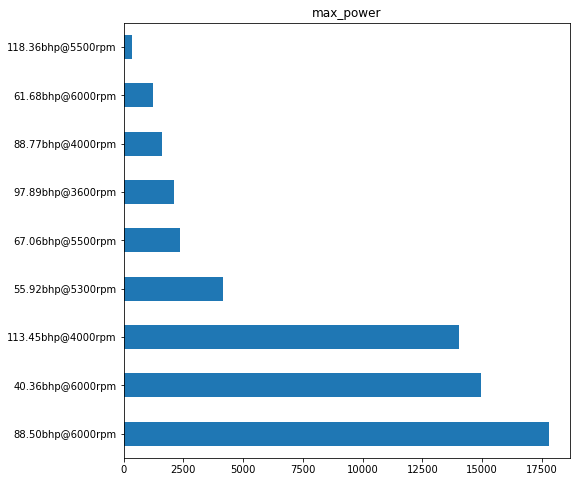

In [369]:
uni_variate('max_power')

2
No     35704
Yes    22888
Name: is_parking_camera, dtype: int64


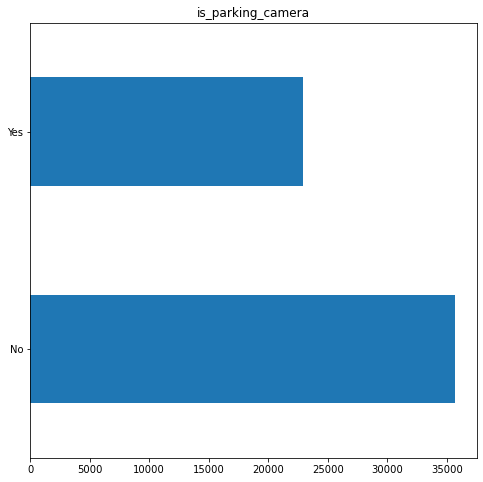

In [370]:
uni_variate('is_parking_camera')

2
Yes    58229
No       363
Name: is_speed_alert, dtype: int64


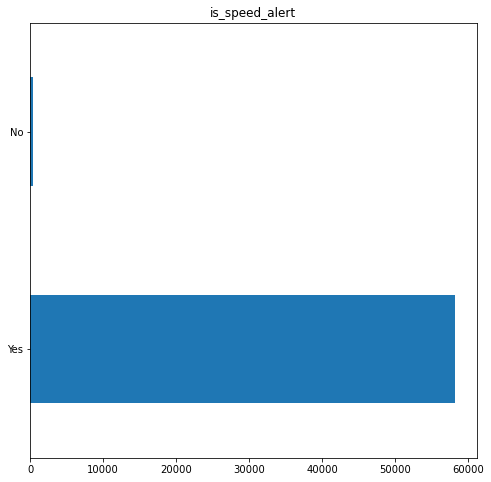

In [371]:
uni_variate('is_speed_alert')

11
F8D Petrol Engine            14948
1.5 L U2 CRDi                14018
K Series Dual jet            13776
K10C                          4173
1.2 L K Series Engine         2940
1.0 SCe                       2373
i-DTEC                        2114
1.5 Turbocharged Revotorq     1598
G12B                          1209
1.2 L K12N Dualjet            1080
1.5 Turbocharged Revotron      363
Name: engine_type, dtype: int64


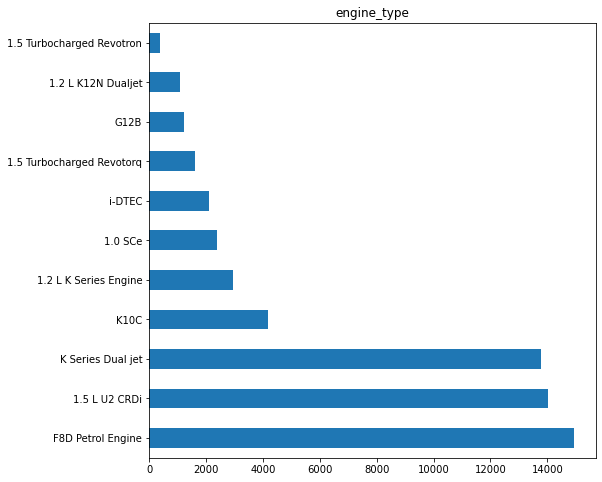

In [372]:
uni_variate('engine_type')

In [373]:
# Outliers treatment

In [374]:
train.describe(percentiles=[0.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.010019,0.020466,0.031107,0.035291,0.042945,0.081874,0.210250,0.573792,1.039104,1.159637,1.204138,1.213437,1.223046,1.232179,1.241190,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.020000,0.060000,0.110000,0.150000,0.170000,0.170000,0.180000,0.190000,0.210000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.288462,0.288462,0.298077,0.298077,0.298077,0.317308,0.365385,0.451923,0.548077,0.644231,0.701923,0.721154,0.740385,0.759615,0.788462,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,290.000000,4076.000000,4076.000000,4076.000000,4076.000000,4076.000000,6112.000000,8794.000000,27003.000000,34738.000000,73430.000000,73430.000000,73430.000000,73430.000000,73430.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,1197.000000,1493.000000,1493.000000,1497.000000,1497.000000,1498.000000,1498.000000,1498.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.500000,4.500000,4.600000,4.600000,4.600000,4.600000,4.600000,4.800000,5.000000,5.200000,5.200000,5.200000,5.200000,5.200000,5.200000,5.200000


In [375]:
outliers

['age_of_car']

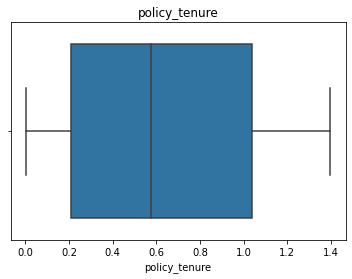

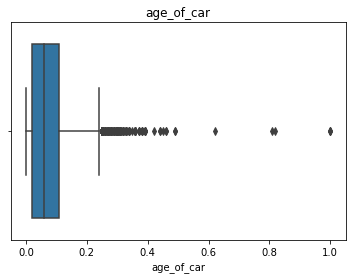

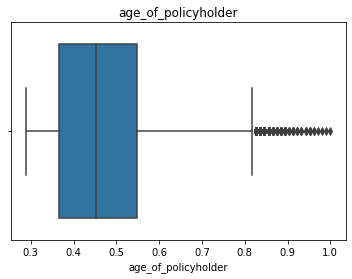

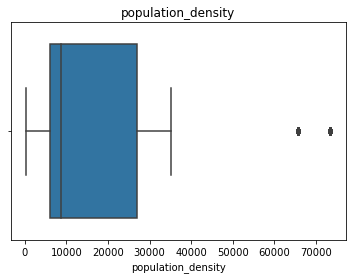

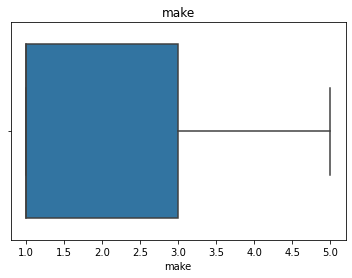

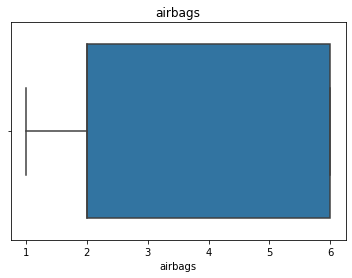

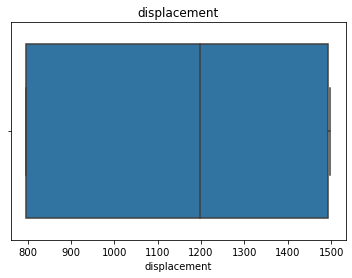

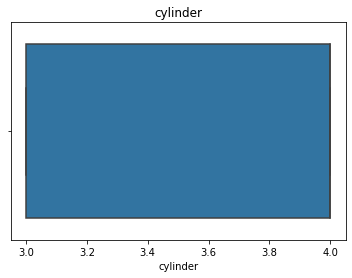

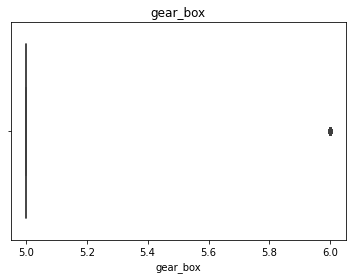

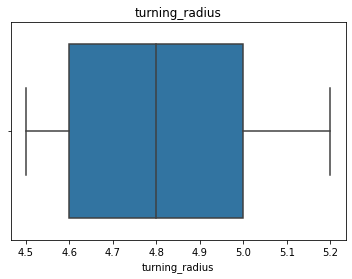

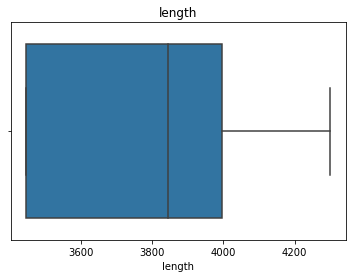

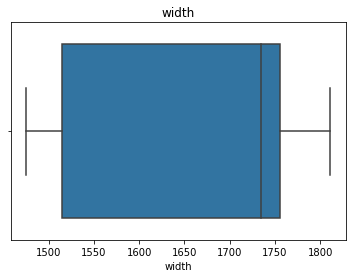

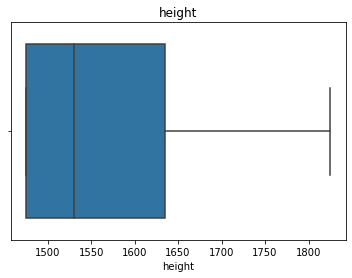

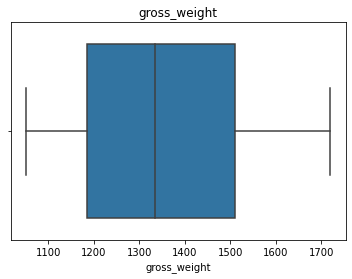

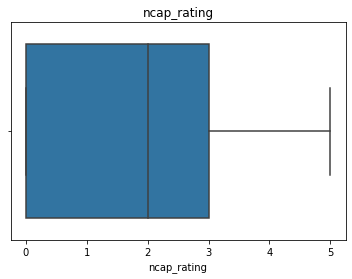

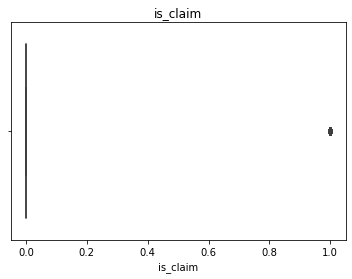

In [376]:
for i in num:
    sns.boxplot(train[i])
    plt.title(i)
    plt.show()

In [377]:
# outliers
outliers=['age_of_car']

In [378]:
train['age_of_car']=np.where(train['age_of_car']>=0.21,0.21,train['age_of_car'])

2
0    54844
1     3748
Name: is_claim, dtype: int64


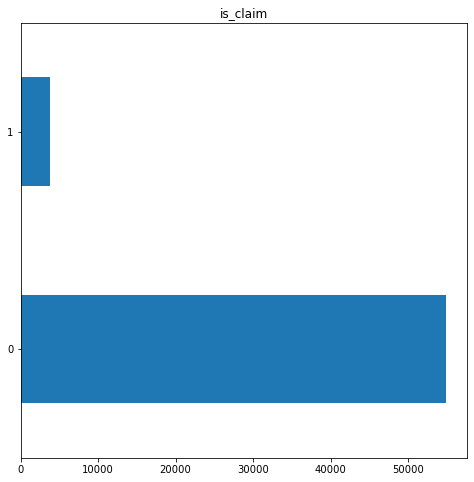

In [379]:
uni_variate('is_claim')

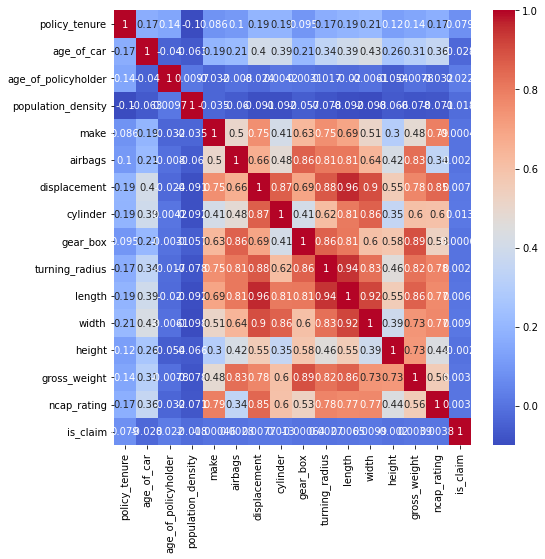

In [380]:
cor=train.corr()
cor_el=cor[abs(cor)>0.5]
plt.figure(figsize=(8,8))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()

In [396]:
train.drop(['make','cylinder','fuel_type','airbags','displacement','length','gear_box','turning_radius'],axis=1,inplace=True)
test.drop(['make','cylinder','fuel_type','airbags','displacement','length','gear_box','turning_radius'],axis=1,inplace=True)

In [407]:
print(train.shape)
print(test.shape)
print(len(obj))
print(len(num))

(58592, 35)
(39063, 34)
23
12


In [408]:
ll=LabelEncoder()
for i in obj:
    train[i]=ll.fit_transform(train[i])
    test[i]=ll.fit_transform(test[i])

In [411]:
x=train.drop('is_claim',axis=1)
y=train['is_claim']

In [412]:
print(x.shape)
print(y.shape)

(58592, 34)
(58592,)


In [ ]:
# train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [434]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(43944, 34)
(43944,)
(14648, 34)
(14648,)


In [420]:
print((y.value_counts()/y.shape[0])*100)
# target variable is imbalanced so we have to balance it and we can do balancing by either doing oversapmling or undersampling 

0    93.603222
1     6.396778
Name: is_claim, dtype: float64


In [431]:
#oversampling - SMOTE 
ss=SMOTE()
x_train_bal,y_train_bal=ss.fit_resample(x_train,y_train)
x_test_bal,y_test_bal=ss.fit_resample(x_test,y_test)

In [436]:
print(x_train_bal.shape)
print(y_train_bal.shape)
print(x_test_bal.shape)
print(y_test_bal.shape)
print(y_test_bal.value_counts())

(82320, 34)
(82320,)
(27368, 34)
(27368,)
0    13684
1    13684
Name: is_claim, dtype: int64


In [482]:
# Standard scaling
ss=StandardScaler()
x_train_stan=ss.fit_transform(x_train)
x_test_stan=ss.fit_transform(x_test)
# balanced data
x_train_stan_bal=ss.fit_transform(x_train_bal)
x_test_stan_bal=ss.fit_transform(x_test_bal)
from sklearn.metrics import roc_curve

In [517]:
def evaluation_metrics(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    print('training accuracy is',model.score(x_train,y_train))
    print('validation accuracy is',model.score(x_test,y_test))
    y_pred=model.predict(x_train)
    print(confusion_matrix(y_train,y_pred))
    print(classification_report(y_train,y_pred))

In [499]:
# Imbalanced data 
model=LogisticRegression()
evaluation_metrics(model,x_train_stan,y_train,x_test_stan,y_test)

training accuracy is 0.9366466411796832
validation accuracy is 0.934188967777171
[[41160     0]
 [ 2784     0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     41160
           1       0.00      0.00      0.00      2784

    accuracy                           0.94     43944
   macro avg       0.47      0.50      0.48     43944
weighted avg       0.88      0.94      0.91     43944



In [440]:
# Imbalanced data 
model=LogisticRegression()
evaluation_metrics(model,x_train_stan_bal,y_train_bal,x_test_stan_bal,y_test_bal)

training accuracy is 0.5913751214771623
validation accuracy is 0.5849166910260157
[[24380 16780]
 [16858 24302]]
              precision    recall  f1-score   support

           0       0.59      0.59      0.59     41160
           1       0.59      0.59      0.59     41160

    accuracy                           0.59     82320
   macro avg       0.59      0.59      0.59     82320
weighted avg       0.59      0.59      0.59     82320



In [511]:
## RandomForest Classifier
rf=RandomForestClassifier()

In [512]:
params={'n_estimators':[100,150],'max_depth':[5,7],'min_samples_split':[100,400]}
gg=GridSearchCV(rf,param_grid=params,n_jobs=-1,refit=True,cv=5,verbose=0)

In [513]:
gg.fit(x_train_bal,y_train_bal)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7], 'min_samples_split': [100, 400],
                         'n_estimators': [100, 150]})

In [514]:
gg.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_split=100)

In [515]:
gg.best_params_

{'max_depth': 7, 'min_samples_split': 100, 'n_estimators': 100}

In [520]:
rf=RandomForestClassifier(max_depth=7,min_samples_split=100)
evaluation_metrics(rf,x_train_bal,y_train_bal,x_test_bal,y_test_bal)

training accuracy is 0.7051506316812439
validation accuracy is 0.6772142648348436
[[25883 15277]
 [ 8995 32165]]
              precision    recall  f1-score   support

           0       0.74      0.63      0.68     41160
           1       0.68      0.78      0.73     41160

    accuracy                           0.71     82320
   macro avg       0.71      0.71      0.70     82320
weighted avg       0.71      0.71      0.70     82320



In [523]:
clf=RandomForestClassifier(n_estimators=500,criterion='gini',max_depth=12,min_samples_leaf=1,min_samples_split=5,random_state=1,n_jobs=None)
evaluation_metrics(clf,x_train_bal,y_train_bal,x_test_bal,y_test_bal)

training accuracy is 0.7766642371234208
validation accuracy is 0.7092589885998246
[[27969 13191]
 [ 5194 35966]]
              precision    recall  f1-score   support

           0       0.84      0.68      0.75     41160
           1       0.73      0.87      0.80     41160

    accuracy                           0.78     82320
   macro avg       0.79      0.78      0.77     82320
weighted avg       0.79      0.78      0.77     82320

